In [1]:
import pandas as pd
import re
from sklearn.model_selection import train_test_split, cross_validate
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import (
    accuracy_score, f1_score, roc_auc_score, precision_score, recall_score,
    confusion_matrix)
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# === 1. Carregar dados e limpar
df_fake = pd.read_csv("Data/Fake.csv")
df_true = pd.read_csv("Data/True.csv")

df_fake['label'] = 0
df_true['label'] = 1

df_fake.drop(columns=["title", "date", "subject"], inplace=True, errors='ignore')
df_true.drop(columns=["title", "date", "subject"], inplace=True, errors='ignore')

def limpar_prefixo_agencia(texto):
    return re.sub(r"^(.*?\(Reuters\)[\s\-–]*)", "", texto)

df_true['text'] = df_true['text'].apply(limpar_prefixo_agencia)

df = pd.concat([df_fake, df_true], ignore_index=True)
df = df.drop_duplicates(subset='text').sample(frac=1, random_state=42).reset_index(drop=True)
df['input'] = df['text']

In [3]:
# === 2. Split treino/teste
X_train, X_test, y_train, y_test = train_test_split(
    df['input'], df['label'], test_size=0.2, stratify=df['label'], random_state=42
)

In [4]:
# === 3. Vetorização TF-IDF
vectorizer = TfidfVectorizer(
    stop_words=None, max_features=20000, max_df=0.75, min_df=2, ngram_range=(1, 2)
)
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)


In [5]:
# === 4. Modelo LR
model = LogisticRegression(
    C=100, class_weight="balanced", penalty="l2", solver="liblinear", max_iter=1000
)

In [6]:
# === 5. Treino 
model.fit(X_train_vec, y_train)

# === 6. Avaliação no conjunto de teste
y_test_pred = model.predict(X_test_vec)
y_test_prob = model.predict_proba(X_test_vec)[:, 1]

test_acc = accuracy_score(y_test, y_test_pred)
test_prec = precision_score(y_test, y_test_pred)
test_rec = recall_score(y_test, y_test_pred)
test_f1 = f1_score(y_test, y_test_pred)
test_roc = roc_auc_score(y_test, y_test_prob)

print("\nTest Set Results:")
print(f"Accuracy:  {test_acc:.4f}")
print(f"Precision: {test_prec:.4f}")
print(f"Recall:    {test_rec:.4f}")
print(f"F1-score:  {test_f1:.4f}")
print(f"ROC AUC:   {test_roc:.4f}")



Test Set Results:
Accuracy:  0.9911
Precision: 0.9904
Recall:    0.9934
F1-score:  0.9919
ROC AUC:   0.9992


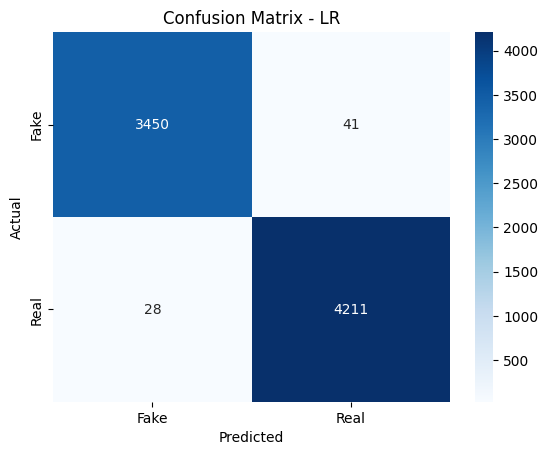

In [7]:
# === 7. Confusion Matrix
cm = confusion_matrix(y_test, y_test_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Fake', 'Real'], yticklabels=['Fake', 'Real'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - LR')
plt.show()

In [8]:
# === 8. Modelo LR
svm_model = SVC(kernel='linear', class_weight="balanced", random_state=42)


In [9]:
# === 9. Treino 
svm_model.fit(X_train_vec, y_train)


# === 10. Avaliação no conjunto de teste
y_pred = svm_model.predict(X_test_vec)
y_prob = svm_model.decision_function(X_test_vec)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_prob)

print("Test Set Results:")
print(f"Accuracy:  {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall:    {recall:.4f}")
print(f"F1-score:  {f1:.4f}")
print(f"ROC AUC:   {roc_auc:.4f}")


Test Set Results:
Accuracy:  0.9912
Precision: 0.9908
Recall:    0.9932
F1-score:  0.9920
ROC AUC:   0.9992


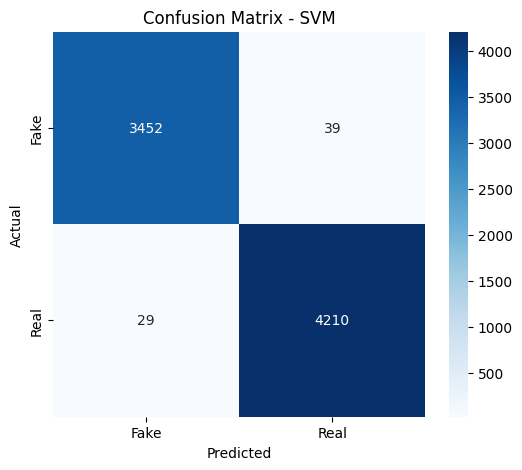

In [10]:

# === 11. Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 5))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Fake', 'Real'], yticklabels=['Fake', 'Real'])
plt.title('Confusion Matrix - SVM')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()